## ML_LAB_5

Name: Imaad Hajwane  
SRN: 202101132  
Roll No: 21  
Program: Computer Engineering  
Year: Last year  
Div: A  
Subject: ML  

Q. Write a program to implement K-Nearest Mean clustering Algorithm and find the value of k using WCSS

###### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score


###### read csv file

In [2]:
# Read the CSV file
df = pd.read_csv("Almond.csv")


###### basic informations

In [3]:
# Display the basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nDataset Head:")
print(df.head())

# Display the statistical summary of the dataset
print("\nDataset Description:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 

###### identification of missing values and filling the missing values 

In [4]:
df.isnull()


,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,False,True,False,False,False,False,True,False,False,True,True,False,False,False
1,False,True,False,False,False,False,True,False,False,True,True,False,False,False
2,False,True,False,False,False,False,True,False,False,True,True,False,False,False
3,False,True,False,False,False,False,True,False,False,True,True,False,False,False
4,False,True,False,False,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,False,True,False,False,False,False,True,False,False,True,True,False,False,False
2799,False,True,False,False,False,False,True,False,False,True,True,False,False,False
2800,False,True,False,False,False,False,True,False,False,True,True,False,False,False
2801,False,True,False,False,False,False,True,False,False,True,True,False,False,False


In [5]:
df.isnull().sum()


Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [6]:
# Replace missing values with 0
df.fillna(0, inplace=True)


In [7]:
df.isnull().sum()


Unnamed: 0                  0
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

###### selection of relevantfeatures in the dataset

In [8]:
# Select relevant features for clustering
X = df[['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)']]


##### Implementation of K-Means clustering using WCSS

In [9]:
# Implement K-Means clustering and find the optimal value of K using WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


###### Elbow Plot

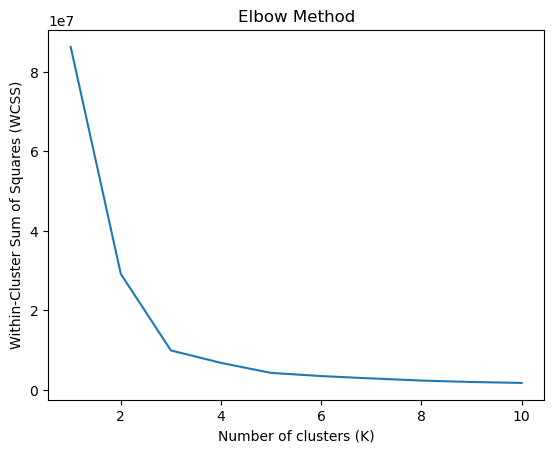

In [10]:
# Plot the Elbow curve to find the optimal value of K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


###### Identification of Elbow Point

In [11]:
from kneed import KneeLocator

k_range = list(range(1, 11))

# Use kneedle to find the elbow
kneedle = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')

# Get the optimal k value
optimal_k = kneedle.elbow
print(f"The optimal number of clusters is: {optimal_k}")


The optimal number of clusters is: 3


In [12]:
# Implementing K-Means clustering with the optimal value of K
k = 3  
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)


###### Evaluation Score (Silhouette score)

In [13]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, pred_y)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.7121232447493592


###### Cluster Plot K=3

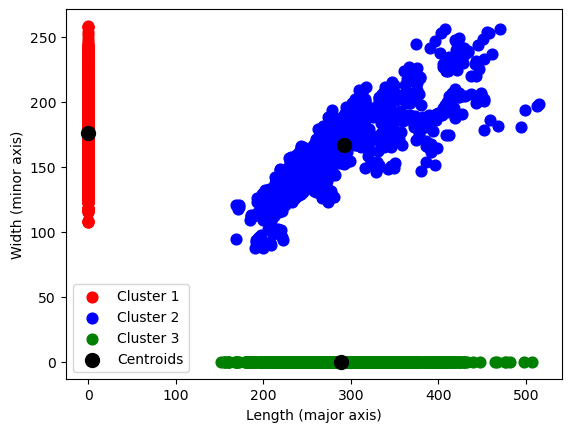

In [14]:
# Convert DataFrame to NumPy array
X_array = X.to_numpy()

# Plotting the clusters and centroids
plt.scatter(X_array[pred_y == 0, 0], X_array[pred_y == 0, 1], s=60, c='red', label='Cluster 1')
plt.scatter(X_array[pred_y == 1, 0], X_array[pred_y == 1, 1], s=60, c='blue', label='Cluster 2')
plt.scatter(X_array[pred_y == 2, 0], X_array[pred_y == 2, 1], s=60, c='green', label='Cluster 3')
# Add more scatter plots for additional clusters if needed

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.xlabel('Length (major axis)')
plt.ylabel('Width (minor axis)')
plt.legend()
plt.show()


----------------------

#### PLOTS

c:\Users\iamim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


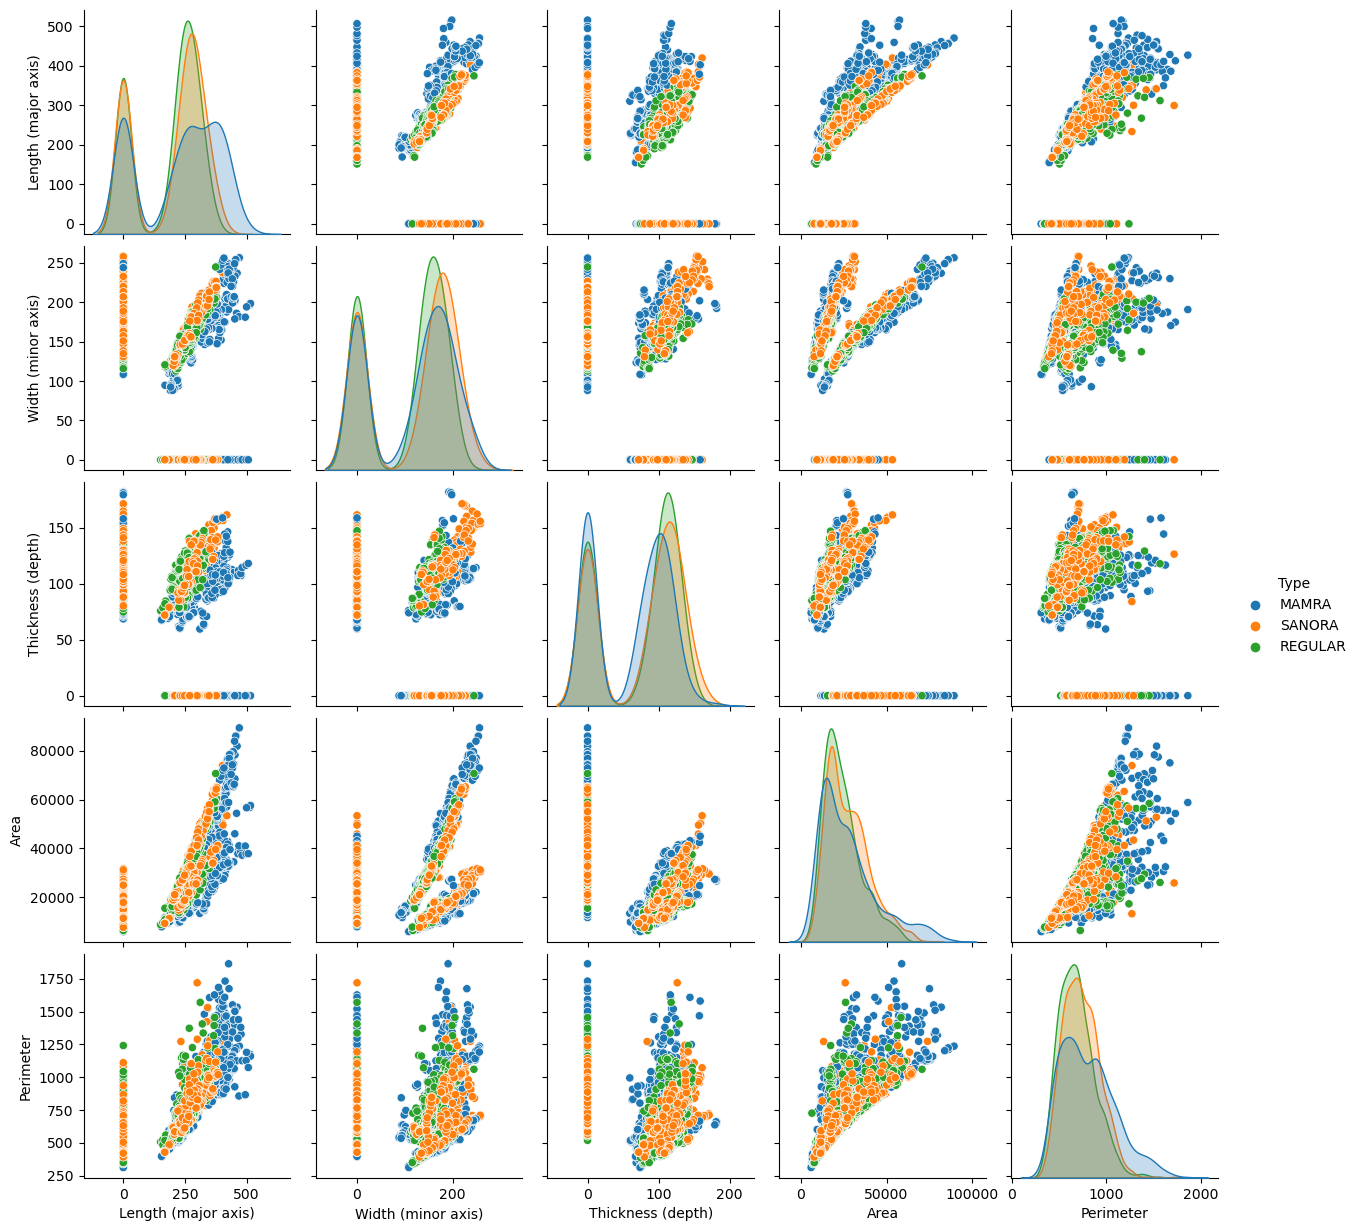

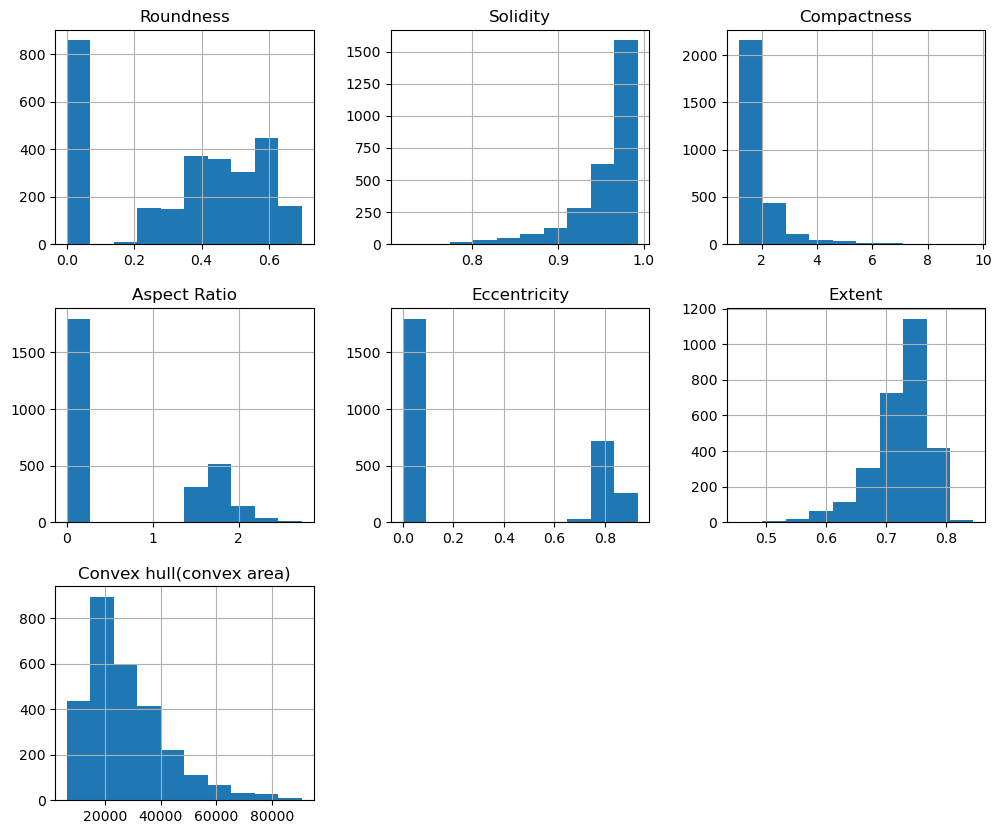

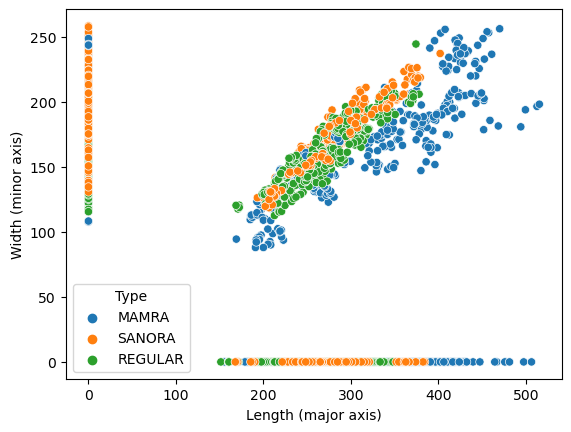

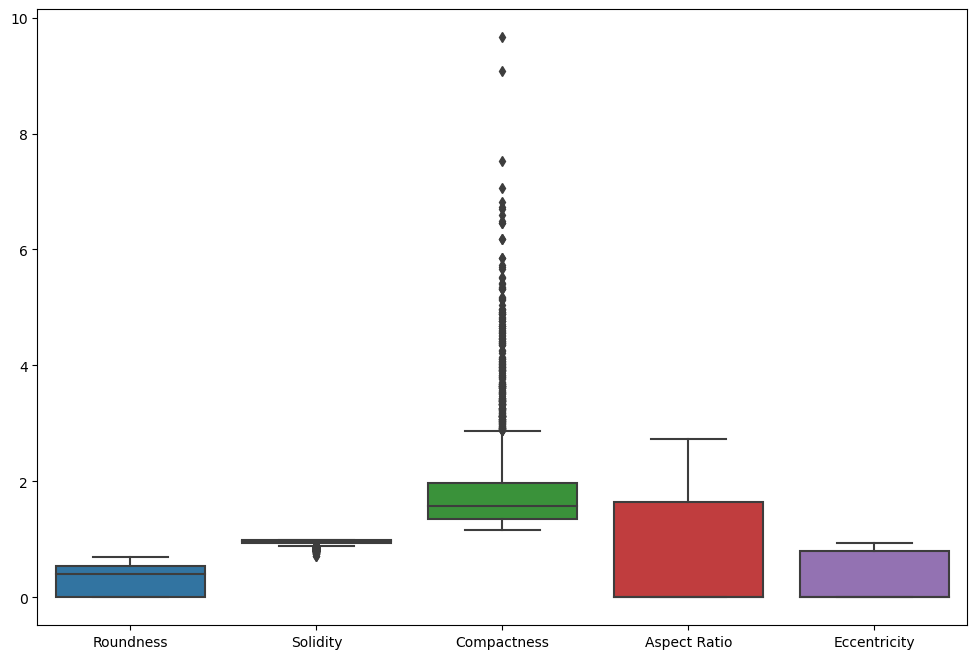

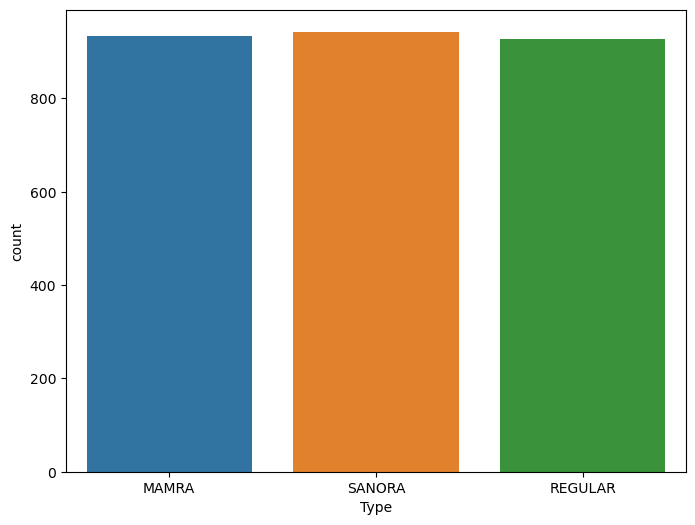

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df, vars=["Length (major axis)", "Width (minor axis)", "Thickness (depth)", "Area", "Perimeter"], hue='Type')
plt.show()

# Histograms
df.hist(column=["Roundness", "Solidity", "Compactness", "Aspect Ratio", "Eccentricity", "Extent", "Convex hull(convex area)"], figsize=(12, 10))
plt.show()

# Scatter Plots
sns.scatterplot(data=df, x="Length (major axis)", y="Width (minor axis)", hue="Type")
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Roundness', 'Solidity', 'Compactness', 'Aspect Ratio', 'Eccentricity']])
plt.show()

# Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type')
plt.show()


##### PLOTS (Imporved Interactions)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import pandas as pd

# Seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)



c:\Users\iamim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


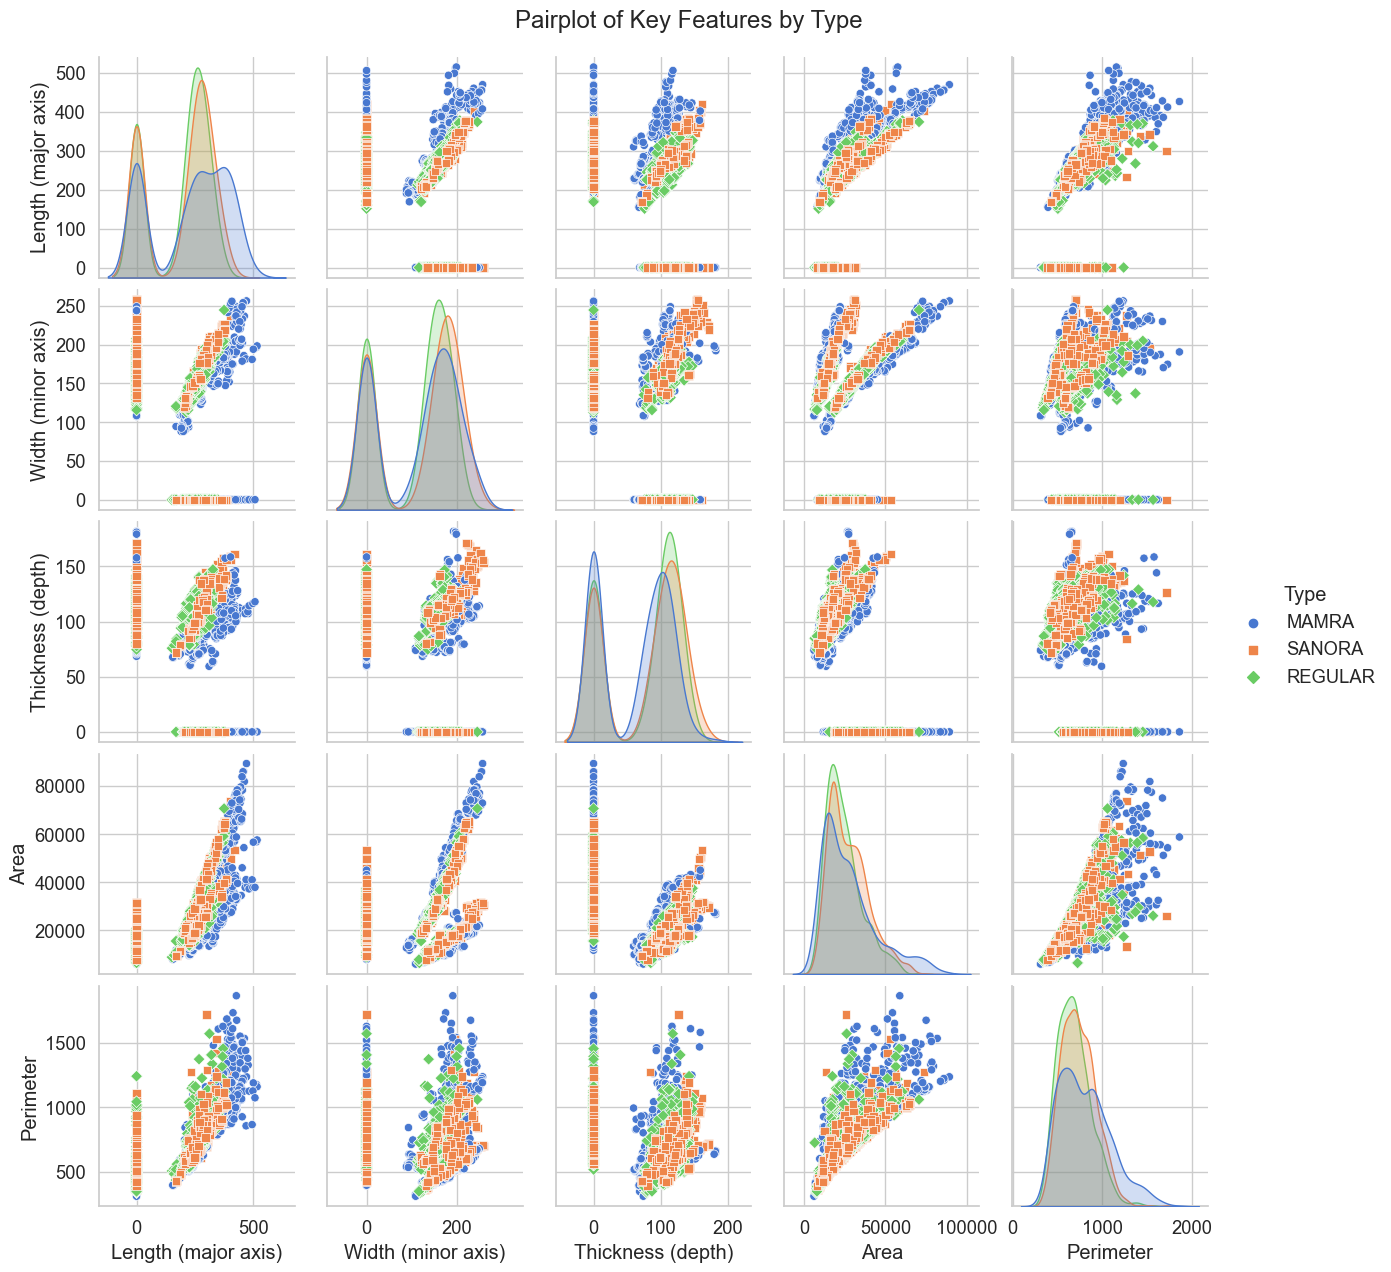

In [17]:
# Pairplot
pairplot = sns.pairplot(df, 
                        vars=["Length (major axis)", "Width (minor axis)", "Thickness (depth)", "Area", "Perimeter"], 
                        hue='Type', 
                        diag_kind='kde', 
                        markers=["o", "s", "D"])
pairplot.fig.suptitle("Pairplot of Key Features by Type", y=1.02)
pairplot.savefig("pairplot.png")
plt.show()



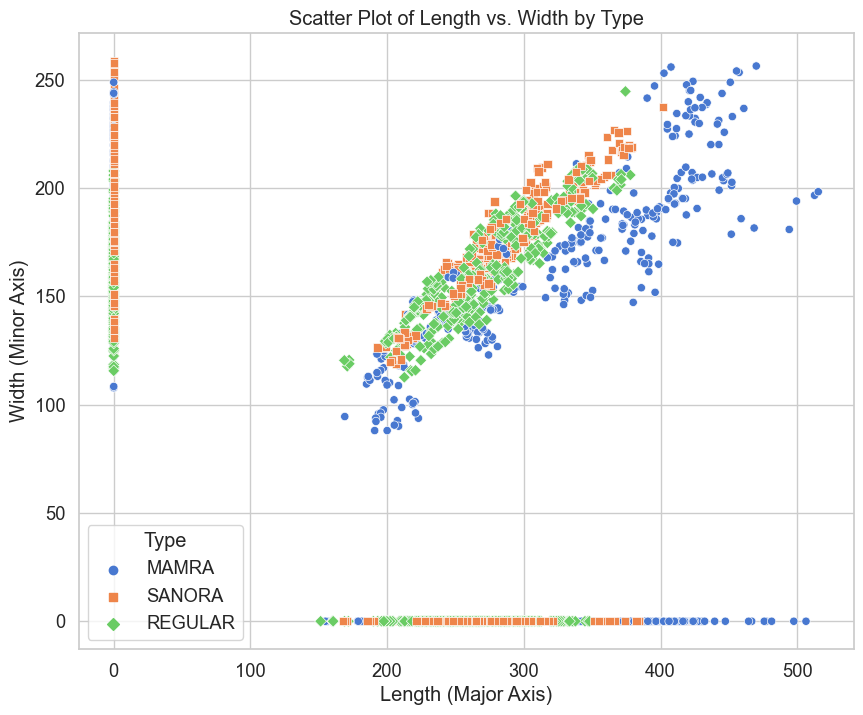

In [18]:
# Scatter Plot with Seaborn
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df, x="Length (major axis)", y="Width (minor axis)", hue="Type", style="Type", markers=["o", "s", "D"])
plt.title("Scatter Plot of Length vs. Width by Type")
plt.xlabel("Length (Major Axis)")
plt.ylabel("Width (Minor Axis)")
plt.legend(title='Type')
plt.savefig("scatter_plot.png")
plt.show()



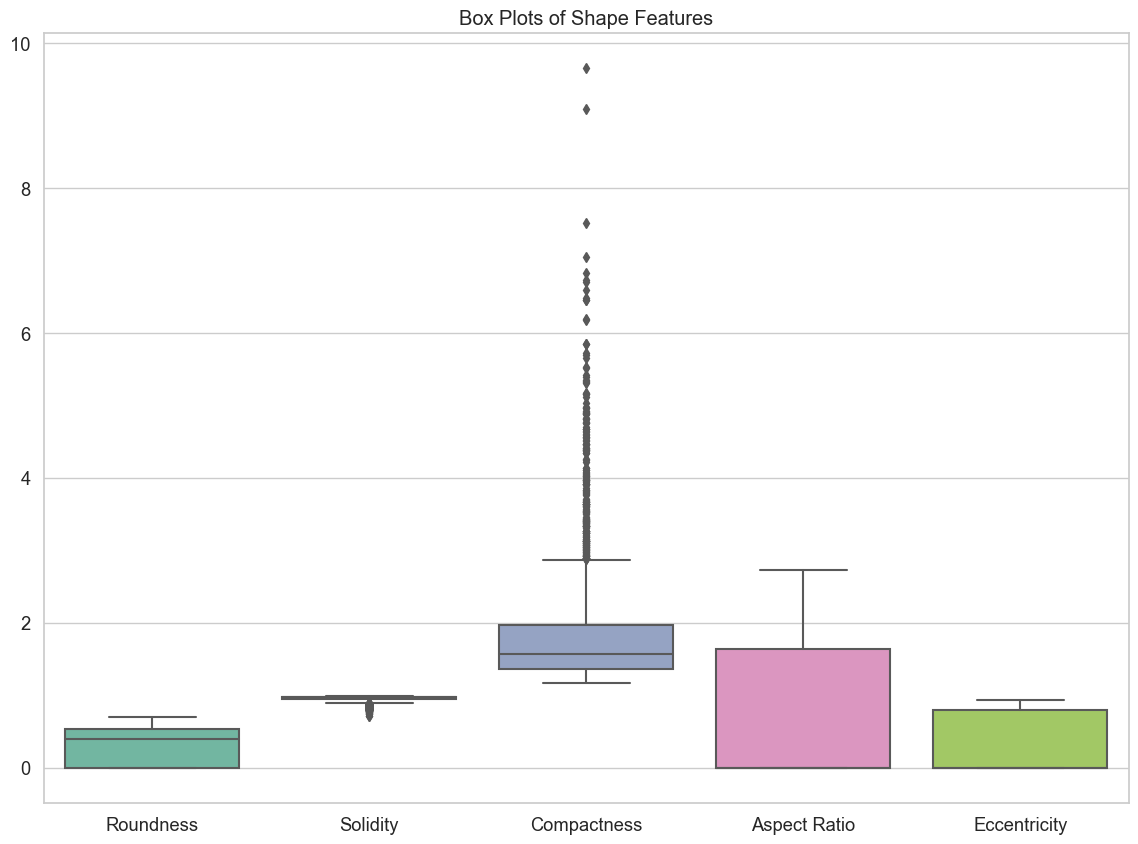

In [19]:
# Box Plots with enhanced layout and color
plt.figure(figsize=(14, 10))
boxplot = sns.boxplot(data=df[['Roundness', 'Solidity', 'Compactness', 'Aspect Ratio', 'Eccentricity']], palette="Set2")
plt.title("Box Plots of Shape Features")
plt.savefig("box_plots.png")
plt.show()



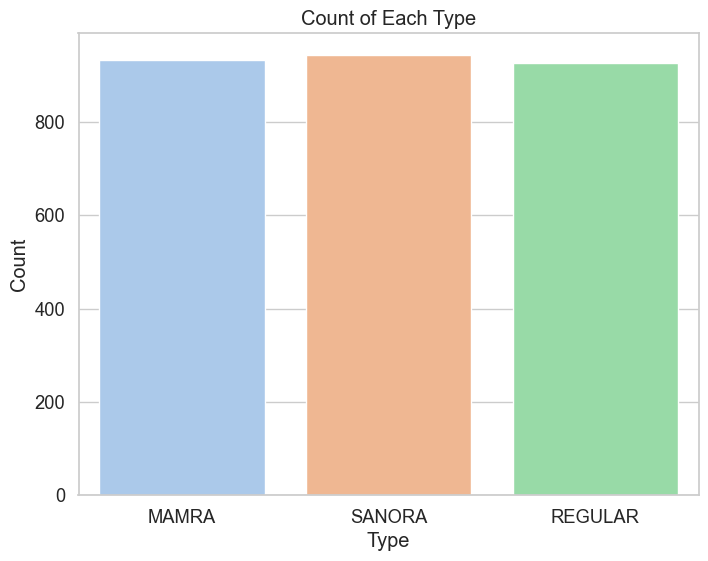

In [20]:

# Count Plot with Seaborn
plt.figure(figsize=(8, 6))
countplot = sns.countplot(data=df, x='Type', palette="pastel")
plt.title("Count of Each Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.savefig("count_plot.png")
plt.show()


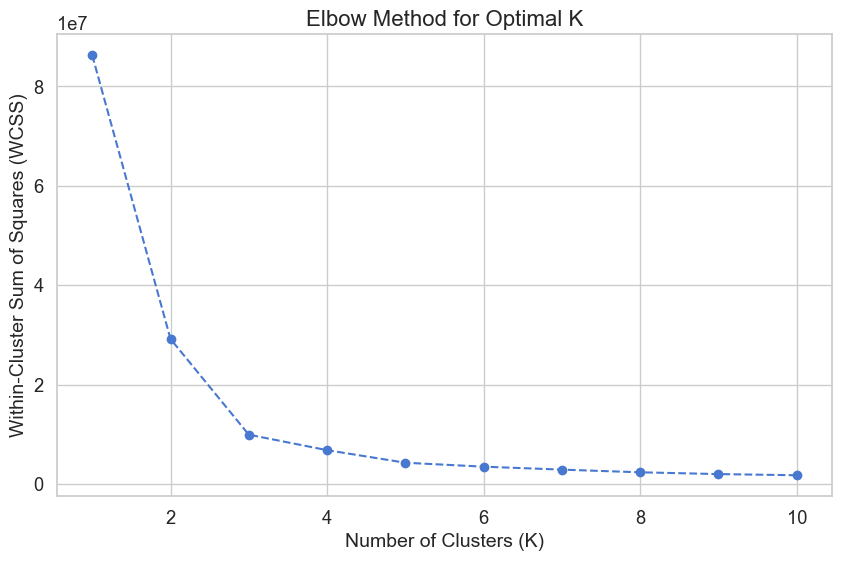

In [21]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

# Matplotlib version
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)
plt.grid(True)
plt.savefig("elbow_curve.png")
plt.show()

# # Plotly interactive version
# elbow_fig = go.Figure()

# elbow_fig.add_trace(go.Scatter(
#     x=list(range(1, 11)),
#     y=wcss,
#     mode='lines+markers',
#     line=dict(dash='dash', color='blue'),
#     marker=dict(symbol='circle', size=10, color='blue'),
#     name='WCSS'
# ))

# elbow_fig.update_layout(
#     title='Elbow Method for Optimal K',
#     xaxis_title='Number of Clusters (K)',
#     yaxis_title='Within-Cluster Sum of Squares (WCSS)',
#     template='plotly_white'
# )

# elbow_fig.write_image("elbow_curve_interactive.png")
# # pio.write_html(elbow_fig, file="elbow_curve_interactive.html", auto_open=True)


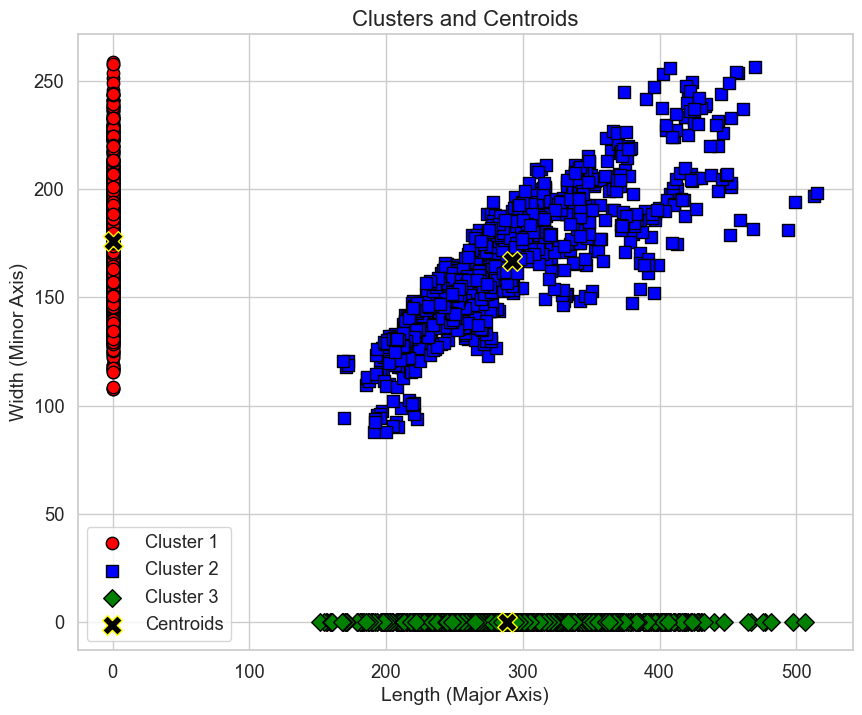

In [22]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Matplotlib Version
plt.figure(figsize=(10, 8))

# Plotting each cluster with customized markers and colors
plt.scatter(X_array[pred_y == 0, 0], X_array[pred_y == 0, 1], s=80, c='red', marker='o', edgecolors='black', label='Cluster 1')
plt.scatter(X_array[pred_y == 1, 0], X_array[pred_y == 1, 1], s=80, c='blue', marker='s', edgecolors='black', label='Cluster 2')
plt.scatter(X_array[pred_y == 2, 0], X_array[pred_y == 2, 1], s=80, c='green', marker='D', edgecolors='black', label='Cluster 3')
# Add more scatter plots for additional clusters if needed

# Plotting centroids with larger, distinct markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', edgecolor='yellow', label='Centroids')

# Adding labels, title, and legend
plt.xlabel('Length (Major Axis)', fontsize=14)
plt.ylabel('Width (Minor Axis)', fontsize=14)
plt.title('Clusters and Centroids', fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig("clusters_and_centroids.png")
plt.show()

# # Plotly Interactive Version
# plotly_fig = go.Figure()

# # Adding clusters
# plotly_fig.add_trace(go.Scatter(
#     x=X_array[pred_y == 0, 0],
#     y=X_array[pred_y == 0, 1],
#     mode='markers',
#     marker=dict(color='red', size=10, symbol='circle', line=dict(width=2, color='black')),
#     name='Cluster 1'
# ))

# plotly_fig.add_trace(go.Scatter(
#     x=X_array[pred_y == 1, 0],
#     y=X_array[pred_y == 1, 1],
#     mode='markers',
#     marker=dict(color='blue', size=10, symbol='square', line=dict(width=2, color='black')),
#     name='Cluster 2'
# ))

# plotly_fig.add_trace(go.Scatter(
#     x=X_array[pred_y == 2, 0],
#     y=X_array[pred_y == 2, 1],
#     mode='markers',
#     marker=dict(color='green', size=10, symbol='diamond', line=dict(width=2, color='black')),
#     name='Cluster 3'
# ))

# # Adding centroids
# plotly_fig.add_trace(go.Scatter(
#     x=kmeans.cluster_centers_[:, 0],
#     y=kmeans.cluster_centers_[:, 1],
#     mode='markers',
#     marker=dict(color='black', size=15, symbol='x', line=dict(width=2, color='yellow')),
#     name='Centroids'
# ))

# # Customizing layout
# plotly_fig.update_layout(
#     title='Clusters and Centroids',
#     xaxis_title='Length (Major Axis)',
#     yaxis_title='Width (Minor Axis)',
#     template='plotly_white'
# )

# # Saving the Plotly figure
# plotly_fig.write_image("clusters_and_centroids_interactive.png")
# pio.write_html(plotly_fig, file="clusters_and_centroids_interactive.html", auto_open=True)
